In [324]:
import sys

from IPython.display import Image, display
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')

In [325]:
%cd '/content/drive/MyDrive/Inteligencia Artificial/IA - Clases de Práctica/ContenidosPorTemas/ActividadesPracticas/Regresion'

[Errno 2] No such file or directory: '/content/drive/MyDrive/Inteligencia Artificial/IA - Clases de Práctica/ContenidosPorTemas/ActividadesPracticas/Regresion'
/workspaces/IA/_9_Regresion


# Regresión Lineal

Es una técnica que modela la relación entre una o más características y una variable target continua. El _Análisis por Regresión_ es una subcategoría del Aprendizaje supervisado y al contrario de la _Clasificación_, la regresión predice las salidas en una escala continua y no mediante etiquetas de clase.

### Regresión lineal simple:

La regresión lineal simple utiliza una única variable de entrada para predecir la salida, la regresión lineal múltiple utiliza más de una variable de entrada.

En este caso, se modela la relación con una sola característica (única variable de entrada). La ecuación del modelo lineal con una sola variable independiente se define:

$$y=w_0 + w_1x$$

$w_0$ y $w_1$ son coeficientes que definen una recta, $w_0$ representa la intersección con el eje $y$ y $w_1$ la pendiente de la recta. Nuestro objetivo es ajustar estos coeficientes de la ecuación lineal, mediante un entrenamiento, para describir la relación entre la variable target y la variable independiente.

Podemos decir que la regresión lineal consiste en encontrar la recta que mejor se ajusta a los puntos, como se muestra en la siguiente imagen:



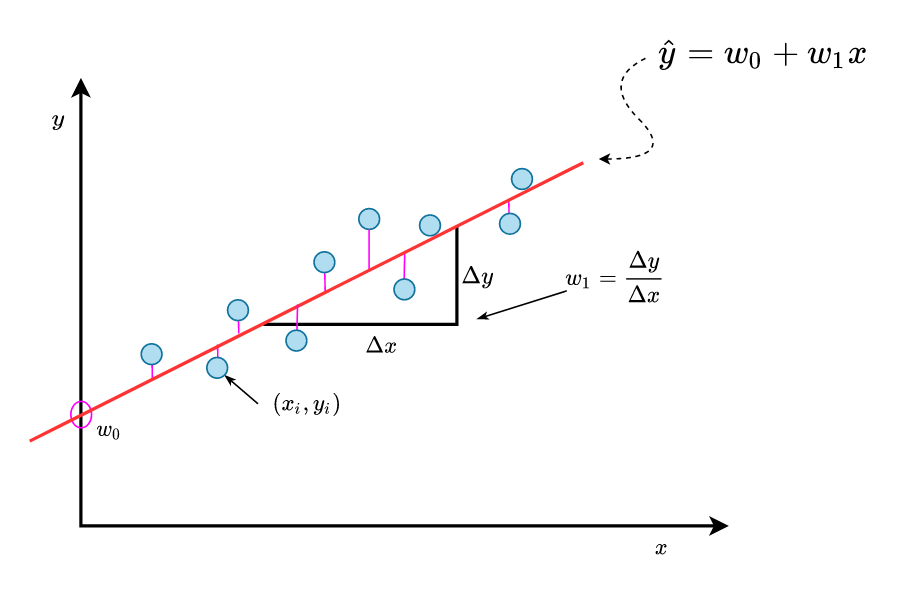

In [326]:
display(Image(filename='./2_imagenes/regresion_lineal.png', width=800))

### Función de costo
Para encontrar la función que mejor se ajusta a los puntos de nuestros datos de entrenamiento, usamos la siguiente función que calcula una diferencia promedio entre la salida "real" de nuestros datos de entrenamiento y la salida del modelo:

$$J(W) = \frac{1}{2N}\sum\limits_{i=1}^{n}(\hat{y}^{(i)}-y^{(i)})^2$$

donde:
- $N$ es el número de ejemplos de entrenamiento.
- $\hat{y}^{(i)}$ es la predicción del modelo para el ejemplo $i$.
- $y^{(i)}$ es el valor real para el ejemplo $i$.

Esta función corresponde al _"Error Cuadrático Medio"_ y se busca minimizarla mediante el algoritmo del _Descenso del gradiente_

El descenso de gradiente es un algoritmo de optimización utilizado para minimizar una función de costo. En el contexto de regresión lineal, el objetivo es ajustar los pesos $W$ de modo que se minimice la diferencia entre las predicciones del modelo y los valores reales.

#### Gradiente de la función de costo

El gradiente de la función de costo con respecto a los pesos $W$ es:

$$ \nabla J(W) = \frac{1}{N} X^T (XW - y)$$

donde:
- $X$ es la matriz de características.
- $W$ es el vector de pesos.
- $y$ es el vector de valores reales.



#### Algoritmo de descenso de gradiente

1. Inicializar los pesos $W$ en ceros o aleatoriamente.
2. Para cada iteración (hasta un número máximo de iteraciones o hasta que la función de costo converja):
   1. Calcular las predicciones $\hat{y}$ usando los pesos actuales $W$.

        $\hat y=w_0 + w_1x$
   2. Calcular el gradiente del costo con respecto a $W$.
   3. Actualizar los pesos $W$ en la dirección negativa del gradiente.

        $W = W - \eta * \nabla J(W)^T $
   4. Calcular y guardar el valor de la función de costo.
3. Retornar los pesos $W$ y los valores de la función de costo.

A continuación implemente la **función de costo** y el **algoritmo del descenso del gradiente**. En esta última función, retorne los pesos entrenados y una lista de los costos durante el entrenamiento para graficarlos en función del número de iteraciones.

In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [328]:
# Implementar la función de costo J

def calcular_costo( X, y, W=np.zeros((1,2)) ):
    N = len(y)
    y_sombrerito = np.dot(W,X)
    costo = np.sum((y_sombrerito.T - y) ** 2)
    costo = costo / (2 * N)
    return costo

In [329]:
def descenso_gradiente(X, y, W=np.zeros((1,2)), eta=0.01, n_iter=1500, tol=1e-6):
    N = len(y)
    costos= []
    for i in range(n_iter):
        grad = (1/N) * np.dot(X, (np.dot(W, X) - y).T)
        W = W - eta * grad.T
        costos.append(calcular_costo(X,y,W))
        if i >= 2:
            if (np.abs(costos[-1]-costos[-2]) < tol).all():
                break

    return W, costos

Vamos a utilizar un conjunto de datos muy simple que representa el precio de una casa en función de la población de una ciudad. Los datos están escalados en unidades de $10000 para el precio y 10000 para la población. Los datos se encuentran en el archivo `data1.txt` de la carpeta `1_datos`.

Cargar los datos del archivo utilizando la función `loadtxt` de la biblioteca `numpy` especificando el parámetro `delimiter=','`. El archivo tiene 2 columnas que representan la variable independiente y la variable dependiente. Aplique el descenso del gradiente a los datos y grafique la función de costo en función del número de iteraciones.

In [330]:
datos = np.loadtxt('1_datos/data1.txt', delimiter=',')

In [331]:
X = datos[:,0]
X = np.vstack((np.ones((X.shape[0])), X))
y = datos[:,1]
w = np.zeros(X.shape[1])

w, costos = descenso_gradiente(X, y)


In [332]:
calcular_costo(X,y)

3111.0551861132

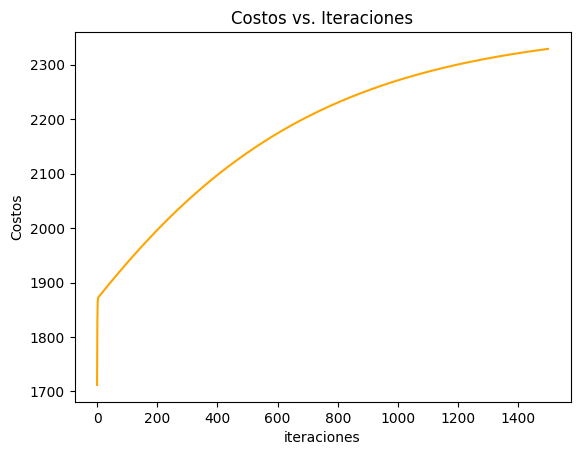

In [333]:
plt.plot(range(1500),costos, color = "orange")
plt.xlabel('iteraciones')
plt.ylabel('Costos')
plt.title('Costos vs. Iteraciones')
plt.show()

Graficar los datos originales en un gráfico de dispersión. Superponga la recta de regresión calculada mediante el descenso de gradiente sobre el gráfico de dispersión. Utilice la clase `LinearRegression` de la biblioteca `scikit-learn` para ajustar una recta de regresión a los datos. Graficar la recta obtenida con [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) en el mismo gráfico de dispersión.

Compare visualmente la recta obtenida con el descenso de gradiente y la recta obtenida con LinearRegression. Analice la diferencia entre ambas rectas de regresión, a qué se debe la diferencia?

### Desempeño del modelo de regresión

El **Error Cuadrático Medio (MSE)**, es una medida cuantitativa muy usada para medir el desempeño de un modelo de regresión.

$$J(W) = \frac{1}{N}\sum\limits_{i=1}^{n}(\hat{y}^{(i)}-y^{(i)})^2$$


Para obtener el **MSE** implemente una función para calcularlo y compare su resultado coon la función `mean_squared_error` del módulo metrics de scikit-learn. Compare los resultados de la función `descenso_gradiente` y `LinearRegression`

Valores de **MSE** cercanos a 0, indican mejor desempeño. Obtenga el rango de los valores a predecir (mínimo y máximo precios) y analice si el resultado obtenido es satisfactorio o no.



In [334]:
def calcular_mse(y_true, y_pred):
    pass

In [335]:
from sklearn.metrics import mean_squared_error


En algunos casos, es más útil reportar el **coeficiente de determinación** $(R^2)$, el cual puede ser entendido como una versión estandarizada del MSE.

$$R^2 = 1- \frac{SSE}{SST}$$

Donde SSE es la suma de los errores cuadráticos y SST la suma total de los cuadrados. $$SST = \sum_{i=1}^{n}(y^{(i)} - \mu_y)^2$$

con $\mu_y$ igual al valor medio de la variable objetivo.

Para el dataset de entrenamiento, $R^2$ está limitado entre 0 y 1, pero puede volverse negativo para los datos de prueba. En este caso, valores de $R^2$ cercanos a 1 indican un mejor desempeño.

Utilice la función `r2_score` del módulo metrics de scikit-learn y calcule el coeficiente de determinación.

In [336]:
from sklearn.metrics import r2_score


# Regresión Polinomial

In [337]:

import pandas as pd
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures



La regresión es no lineal si las variables de entrada, en el modelo de regresión, son modificadas por alguna función (cuadrática, logarítmica, etc). En el caso particular donde se elevan las variables de entrada a alguna potencia, se conoce como regresión polinomial.

### Agregando términos polinómicos a nuestra regresión

Este ejercicio tiene como objetivo aplicar y comparar modelos de regresión lineal y polinómica en un conjunto de datos relacionados con el nivel de agua y la cantidad de agua que se desborda de una presa.

Utilice la función `loadmat` para cargar los datos desde el archivo data3.mat.
Combine los datos de entrenamiento y prueba en las variables X_train y y_train.
Separe los datos de validación en X_test y y_test.

Realice un gráfico de dispersión de los datos de entrenamiento (X_train y y_train)

Ajuste un modelo de regresión lineal a los datos de entrenamiento.
Cree características polinómicas de grado 2 a partir de los datos de entrenamiento usando `PolynomialFeatures`([enlace](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#polynomialfeatures)) y ajuste un modelo de regresión polinómica usando `LinearRegression`.

Realice las predicciones de ambos modelos (lineal y polinómico) en un rango de valores de -50 a 50. Realice un gráfico que muestre las predicciones de ambos modelos superpuestas sobre los datos de entrenamiento.


Realice predicciones en el conjunto de datos de prueba (X_test) utilizando ambos modelos y evalue comparando el Error Cuadrático Medio (MSE) y el coeficiente de determinación (R^2)

Pruebe modificar el grado de las características polinómicas. Observa mejoras en el desempeño del modelo?